# INFO-4604 HW2: Linear Classification 

* Created by Michael Paul on September 21, 2017
* Modified by James Gallmeister on September 26, 2017 (and list any partners)

##### Deadline: Friday, September 29, 5:00pm MT

## Assignment overview

In this assignment, you will experiment with binary classification on a text dataset. You will be classifying President Trump's official tweets to identify the device from which they were posted, as a proxy for predicting who the tweet was written by. (If you took INFO-2301 last year, you have seen this dataset, but we are using different algorithms this time.)

It is known that Donald Trump uses an Android phone, and it has been observed that some of his tweets come from Android while others come from other devices (most commonly iPhone). It is widely believed that Android tweets are written by Trump himself, while iPhone tweets are written by other staff. For more information, you can read this [blog post by David Robinson](http://varianceexplained.org/r/trump-tweets/), written prior to the election, which finds a number of differences in the style and timing of tweets published under these two devices. (Some tweets are written from other devices, but for simplicity the dataset for this assignment is restricted to these two.)

This is a classification task known as "authorship attribution", which is the task of inferring the author of a document when the authorship is unknown. We will see how accurately this can be done with linear classifiers using word features.

### What to hand in

You will submit the assignment on Piazza. A private note to the instructor should be submitted with the subject _"Submission 2 from [your full name]"_ with the submission file(s) as an attachment. The note should be submitted to the `submissions` folder (**not** the `hw2` folder).

Submit a single Jupyter notebook named `hw2lastname.ipynb`, where lastname is replaced with your last name.

If you have any output that is not part of your notebook, you may submit that as a separate document, in a single PDF named `hw2lastname.pdf`. For example, this assignment requires you to create plots. You could do it directly with python using [matplotlib](https://matplotlib.org/), but if you wanted to create them using other software, that's acceptable as long as you put all of the figures in a single document and you clearly label them with the corresponding deliverable number.

### Submission policies

- **Collaboration:** You are allowed to work with up to 3 people besides yourself. You are still expected to write up your own solution. Each individual must post their own submission on Piazza, and you must list the names of your group members in your Piazza note when you submit.
- **Late submissions:** We allow each student to use up to 5 late days over the semester. You have late days, not late hours. This means that if your submission is late by any amount of time past the deadline, then this will use up a late day. If it is late by any amount beyond 24 hours past the deadline, then this will use a second late, and so on. Once you have used up all late days, late assignments will be given at most 50% credit.

### Asking for help

You are encouraged to ask questions on [Piazza](https://piazza.com/colorado/fall2017/info4604). Do not post anything that you are turning in, but you can describe general things you observe about the algorithms. You may ask questions to help with debugging, but do not post your code. You can share error messages and describe what you are trying to do with your code, but try not to write enough to "give away" the solution.

Questions specifically about this assignment should be posted in the `hw2` folder. If you have clarifications about what is being asked, you can tag the instructor in your post. If you have more general programming questions (for example, if you are having trouble installing packages, running the notebook, or working with `numpy`), post in the `python` folder. (You can post in multiple folders if both are relevant.)


## Getting started

In this assignment, you will experiment with perceptron and logistic regression in `sklearn`. Much of the code has already been written for you. We will use a class called `SGDClassifier` (which you should read about in the [sklearn documentation](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)), which  implements stochastic gradient descent (SGD) for a variety of loss functions, including both perceptron and logistic regression, so this will be a way to easily move between the two algorithms.

The code below will load the dataset, which has already been processed for you. There are two collections: the "training" data, which contains the tweets that you will use for training the classifiers, and the "testing" data, which are tweets that you will use to measure the classifier accuracy. The test tweets are instances the classifier has never seen before, so they are a good way to see how the classifier will behave on data it hasn't seen before. However, we still know the labels of the test tweets, so we can measure the accuracy.

For this problem, we will use what are called "bag of words" features, which are commonly used when doing classification with text. Each feature is a word, and the value of a feature for a particular tweet is $1$ if the tweet contains that word and $0$ if not. (There are other ways to assign values to bag of words features, but this binary approach is a simple one that we will use for now.)

Run the block of code below to load the data. You don't need to do anything yet (unless you get an error trying to run the code). Move on to "Problem 1" next.

In [3]:
import pickle
import numpy as np
from urllib2 import urlopen
#from urllib.request import urlopen
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score

data_train = urlopen('http://cmci.colorado.edu/classes/INFO-4604/data/tweets.train.pickle').read()
data_test = urlopen('http://cmci.colorado.edu/classes/INFO-4604/data/tweets.test.pickle').read()

D = np.array(pickle.loads(data_train))
Y = D[:,0]
v = DictVectorizer(sparse=True)
X = v.fit_transform(D[:,1])
feature_names = np.asarray(v.get_feature_names())

D_test = np.array(pickle.loads(data_test))
Y_test = D_test[:,0]
X_test = v.transform(D_test[:,1])


## Problem 1: Understand the data [6 points]

Before doing anything else, let's take the time to understand the code above and what the variables `D`, `Y`, and `X` contain.

First, if you are unfamiliar with `pickle` in python, this is a way of writing the contents of a python variable to a file. The variables `D` and `D_test` were stored in files and have been loaded again. These variables contain an array of instances, where each instance is a list of two things: first, a string label, and second, a dictionary of features that are present in the instance.

For example, if an instance's features are represented by the dictionary `{'see' : 1, 'you' : 1, 'tonight' : 1}`, this means that those three words were present in the tweet, while the values of all other word features are assumed to be $0$. [`DictVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) converts this dictionary representation into a feature vector representation that `sklearn` can use.

You should print out the values of the variables and write any other code needed to answer the following questions.

#### Deliverable 1.1: How many training instances are in the dataset? How many test instances?

There are 2593 training instances in the dataset.
There are 185 test instances.

#### Deliverable 1.2: How many features are in the training data?

There are 5186 features in the training data.

#### Deliverable 1.3: What is the distribution of labels in the training data? That is, what percentage of instances are 'Android' versus 'iPhone'?

48.36% of tweets in the training data came from iPhones and 51.64% of tweets came from Androids.


In [60]:
from sets import Set
# Your code goes here
print "Number of training instances: " + str(len(D))
print "Number of test instances: " + str(len(D_test))
numFeats = 0
numAnds = 0.0
numiPh = 0.0
s = Set();
for x in D:
    if x[0] == "Android":
        numAnds += 1
    elif x[0] == "iPhone":
        numiPh += 1
    for y in x[1]:
        if y not in s:
            s.add(y)
percAnd = (numAnds/len(D)) * 100
perciPh = (numiPh/len(D)) * 100
print "Number of training features: " + str(len(s))
print "The percentage of tweets from an iPhone for the training data is %.2f percent" % perciPh
print "The percentage of tweets from an Android for the training data is %.2f percent" % percAnd

Number of training instances: 2593
Number of test instances: 185
Number of training features: 5047
The percentage of tweets from an iPhone for the training data is 48.36 percent
The percentage of tweets from an Android for the training data is 51.64 percent


## Problem 2: Perceptron [6 points]

The code below trains an [`SGDClassifier`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) using the perceptron loss, then it measures the accuracy of the classifier on the test data, using `sklearn`'s [`accuracy_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function. 

The `fit` function trains the classifier. The feature weights are stored in the `coef_` variable after training. The `predict` function of the trained `SGDClassifier` outputs the predicted label for a given instance or list of instances.

Additionally, this code displays the features and their weights in sorted order, which you may want to examine to understand what the classifier is learning. In this dataset, the $\textrm{Android}$ class is considered the "negative" class because it comes first, so if a feature has a negative weight, this means it is predictive of $\textrm{Android}$, while a feature with a positive weight is predictive of the $\textrm{iPhone}$ class.

There are 3 keyword arguments that have been added to the code below. It is important you keep the same values of these arguments whenever you create an `SGDClassifier` instance in this assignment so that you get consistent results. They are:

- `max_iters` is one of the stopping criteria, which is the maximum number of iterations/epochs the algorithm will run for.

- `tol` is the other stopping criterion, which is how small the difference between the current loss and previous loss should be before stopping.

- `random_state` is a seed for pseudorandom number generation. The algorithm uses randomness in the way the training data are sorted, which will affect the solution that is learned, and even the accuracy of that solution.

Wait a minute $-$ in class we learned that the loss function is convex, so the algorithm will find the same minimum regardless of how it is trained. Why is there random variation in the output? The reason is that even though there is only one minimum value of the loss, there may be different weights that result in the same loss, so randomness is a matter of tie-breaking. What's more, while different weights may have the same loss, they could lead to different classification accuracies, because the loss function is not the same as accuracy. (Unless accuracy was your loss function... which is possible, but uncommon because it turns out to be a difficult function to optimize.)

To begin, run the code in the cell below without modification.

#### Deliverable 2.1: Based on the training accuracy, do you conclude that the data are linearly separable? Why or why not?

I think that our data is linearly seperable. We have a 99% training accuracy, and all words have weights of either being negative, 0 or positive, so I assume that the words with weight 0 are no more likely to be in one group than the other, so I believe that our data is linearly seperable.

#### Deliverable 2.2: Which feature most increases the likelihood that the class is 'iPhone'? Based on the description of the dataset, why do you think this is the case?

The URL feature most increases the likelihood that the class is 'iPhone.' I think this is the case, because many of the training data instances that were iPhones had a link in them, so the weight for that feature is much more positive than any other feature.

<br />

One technique for improving the resulting model with perceptron (or stochastic gradient descent learning in general) is to take an average of the weight vectors learned at different iterations of the algorithm, rather than only using the final weights that minimize the loss. That is, calculate $\bar{\mathbf{w}} = \sum_{t=1}^T \mathbf{w}^{(t)}$ where $\mathbf{w}^{(t)}$ is the weight vector at iteration $t$ of the algorithm and $T$ is the number of iterations, and then use $\bar{\mathbf{w}}$ when making classifications on new data.

To use this technique in your classifier, add the keyword argument `average=True` to the `SGDClassifier` function. Try it now.

#### Deliverable 2.3: Compare the initial training/test accuracies to the training/test accuracies after doing averaging. What happens? Why do you think averaging the weights from different iterations has this effect?

The initial training accuracy is .996143 and the initial test accuracy is 0.859459. After averaging, the training accuracy is .991130 and the test accuracy is 0.875676. After averaging, the training accuracy decreased and the test accuracy increased. I think that averaging the weights from different iterations reduces the accuracies, because it averages all the different weights that give you the same loss minimum, and that happens to give you a lower training accuracy and a higher test accuracy.


In [61]:
classifier = SGDClassifier(loss='perceptron', max_iter=1000, tol=1.0e-12, random_state=123, average = True)
classifier.fit(X, Y)

print("Number of SGD iterations: %d" % classifier.n_iter_)
print("Training accuracy: %0.6f" % accuracy_score(Y, classifier.predict(X)))
print("Testing accuracy: %0.6f" % accuracy_score(Y_test, classifier.predict(X_test)))

print("\nFeature weights:")
args = np.argsort(classifier.coef_[0])
for a in args:
    print(" %s: %0.4f" % (feature_names[a], classifier.coef_[0][a]))

Number of SGD iterations: 19
Training accuracy: 0.991130
Testing accuracy: 0.875676

Feature weights:
 USERNAME: -4.4649
 wow: -4.0476
 donaldtrump: -3.7379
 badly: -3.7224
 woman: -3.6903
 policy: -3.6062
 talking: -3.5416
 weak: -3.3793
 10:00: -3.3212
 e-mails: -3.2900
 making: -3.2871
 talks: -3.2022
 veterans: -3.1344
 being: -3.0340
 into: -3.0084
 reviews: -3.0011
 wrong: -2.9382
 running: -2.8886
 fake: -2.8421
 crooked: -2.8046
 own: -2.7708
 economy: -2.6690
 8:00: -2.6453
 women: -2.6206
 hillaryclinton: -2.5762
 allowed: -2.5543
 mess: -2.4821
 media: -2.4728
 president: -2.4632
 actually: -2.4603
 dumb: -2.4561
 mr: -2.4442
 night: -2.4364
 statement: -2.3989
 expensive: -2.3812
 dead: -2.3635
 doesnt: -2.3550
 rather: -2.3411
 solve: -2.3323
 standing: -2.3220
 eastern: -2.3098
 senator: -2.2934
 that: -2.2904
 stated: -2.2881
 look: -2.2674
 paid: -2.2644
 sources: -2.2222
 crowds: -2.2029
 called: -2.1869
 children: -2.1814
 sold: -2.1607
 four: -2.1545
 wonder: -2.1532

 useless: -0.6095
 hike: -0.6095
 practically: -0.6095
 web: -0.6095
 deductibles: -0.6095
 clowns: -0.6095
 open-and: -0.6091
 muslims: -0.6091
 flow: -0.6091
 model: -0.6084
 sending: -0.6084
 chevy: -0.6084
 car: -0.6084
 cruze: -0.6084
 dealers-tax: -0.6084
 checked: -0.6081
 hello: -0.6081
 formal: -0.6081
 hostages: -0.6080
 terrorists: -0.6080
 cite: -0.6080
 koran: -0.6080
 bangladesh: -0.6080
 verse: -0.6080
 unable: -0.6080
 dinesh: -0.6064
 dsousa: -0.6064
 #60minutes: -0.6051
 cbs: -0.6051
 mate: -0.6051
 joint: -0.6051
 appear: -0.6051
 candy: -0.6045
 un-american: -0.6045
 speaking: -0.6030
 referring: -0.6014
 heel: -0.6014
 blacks: -0.6014
 predators: -0.6014
 pass: -0.5998
 poorly: -0.5996
 wisconsins: -0.5996
 everywhere: -0.5996
 stake: -0.5990
 stole: -0.5990
 tell: -0.5990
 drone: -0.5990
 fair: -0.5988
 panel: -0.5988
 shake: -0.5988
 never: -0.5979
 minnesota: -0.5966
 lousy: -0.5966
 alicia: -0.5964
 sex: -0.5964
 citizen: -0.5964
 tape: -0.5964
 wi: -0.5948
 ow

 #americanunity: 0.0000
 #americasmerkel: 0.0000
 joey: 0.0000
 #arizonaprimary: 0.0000
 #azprimary: 0.0000
 #bengazi: 0.0000
 #benghazi: 0.0000
 #bigleagetruth: 0.0000
 #leadright2016: 0.0000
 jerks: 0.0000
 jeff: 0.0000
 jebs: 0.0000
 #ca4trump: 0.0000
 #caprimary: 0.0000
 #cbsnews: 0.0000
 #circleofenrichment: 0.0000
 #commanderinchiefforum: 0.0000
 #corrupthillary: 0.0000
 #ctprimary: 0.0000
 #dday: 0.0000
 #demsinphilly: 0.0000
 jacksonville: 0.0000
 jackson: 0.0000
 jeffrey: 0.0000
 #lesm: 0.0000
 interrupts: 0.0000
 interruptions: 0.0000
 #orprimary: 0.0000
 #paprimary: 0.0000
 indignant-hear: 0.0000
 indianapolis: 0.0000
 #paytoplay: 0.0000
 index: 0.0000
 #pence: 0.0000
 independence: 0.0000
 #philrobertson: 0.0000
 indeed: 0.0000
 #racine: 0.0000
 #rallyforriley: 0.0000
 #repealandreplace: 0.0000
 #openingceremony: 0.0000
 #rio2016: 0.0000
 #riprimary: 0.0000
 incorrectly: 0.0000
 incorrect: 0.0000
 incompetence: 0.0000
 #rtm2016: 0.0000
 #secondamendment: 0.0000
 #standwithl

## Problem 3: Logistic regression [15 points]

For this problem, create a new `SGDClassifier`, this time setting the `loss` argument to `'log'`, which will train a logistic regression classifier.

Once you have trained the classifier, you can use the `predict` function to get the classifications, as with perceptron. Additionally, logistic regression provides probabilities for the predictions. You can get the probabilities by calling the `predict_proba` function. This will give a list of two numbers; the first is the probability that the class is $\textrm{Android}$ and the second is the probability that the class is $\textrm{iPhone}$.


For the first task, add the keyword argument `alpha` to the `SGDClassifier` function. This is the regularization strength, called $\lambda$ in lecture. If you don't specify `alpha`, it defaults to $0.0001$. Experiment with other values and see how this affects the outcome.

#### Deliverable 3.1: Calculate the training and testing accuracy when `alpha` is one of $[0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]$. Create a plot where the x-axis is `alpha` and the y-axis is accuracy, with two lines (one for training and one for testing). Use [a log scale for the x-axis](https://matplotlib.org/examples/pylab_examples/log_demo.html) so that the `alpha` values are spaced evenly.

See below for graph.

#### Deliverable 3.2: Examine the classifier probabilities using the `predict_proba` function when training with different values of `alpha`. What do you observe? How does `alpha` affect the prediction probabilities, and why do you think this happens?

As alpha increases, the probabilities given become much closer together. For example, when alpha is 0.0001, the first feature has a 0.99985 probability of being sent from an Android and a 0.000149 probability of being sent from an iPhone. As alpha increases, the distance between those two probabilities decreases. For example, when alpha is set to 100, the first feature has a 0.6835819 probability of being an Android and a 0.3164181 probability of being an iPhone. As alpha increases, it seems that the classifier is less sure of its classificiation of each feature.

<br />

Now remove the `alpha` argument so that it goes back to the default value. We'll now look at the effect of the learning rate. By default, `sklearn` uses an "optimal" learning rate based on some heuristics that work well for many problems. However, it can be good to see how the learning rate can affect the algorithm.

For this task, add the keyword argument `learning_rate` to the `SGDClassifier` function and set the value to `invscaling`. This defines the learning rate at iteration $t$ as: $\eta_t = \frac{\eta_0}{t^a}$, where $\eta_0$ and $a$ are both arguments you have to define in the `SGDClassifier` function, called `eta_0` and `power_t`, respectively. Experiment with different values of `eta_0` and `power_t` and see how they affect the number of iterations it takes the algorithm to converge. You will often find that it will not finish within the maximum of $1000$ iterations.

#### Deliverable 3.3: Fill in the table below with the number of iterations for values of `eta_0` in $[10.0, 100.0, 1000.0, 10000.0]$ and values of `power_t` in $[0.5, 1.0, 2.0]$. You may find it easier to write python code that can output the markdown for the table, but if you do that place the output here. If it does not converge within the maximum number of iterations (set to $1000$ by `max_iters`), record $1000$ as the number of iterations.

| `eta_0`   | `power_t` | # Iterations |
|-----------|-----------|--------------|
| $10.0$    | $0.5$     |       67     |
| $10.0$    | $1.0$     |     1000     |
| $10.0$    | $2.0$     |     1000     |
| $100.0$   | $0.5$     |      8       |
| $100.0$   | $1.0$     |     1000     |
| $100.0$   | $2.0$     |     1000     |
| $1000.0$  | $0.5$     |      7       |
| $1000.0$  | $1.0$     |     1000     |
| $1000.0$  | $2.0$     |     1000     |
| $10000.0$ | $0.5$     |      11      |
| $10000.0$ | $1.0$     |      16      |
| $10000.0$ | $2.0$     |     1000     |

#### Deliverable 3.4: Describe how `eta_0` and `power_t` affect the learning rate based on the formula (e.g., if you increase `power_t`, what will this do to the learning rate?), and connect this to what you observe in the table above.

If you increase 'power_t', the learning rate will decrease, because you will increase the denominator of the formula above. If you increase 'eta_0', the learning rate will increase, because you are increasing the numerator of the formula above. We see this in our data from the table above, in that when power_t is less than 1, it always converged with the numbers we used, and when power_t is greater than 1, it more often than not, diverges. This didn't occur only when our 'eta0' was set to a very large number, which counteracted the effect of the larger 'power_t' variable (as seen when eta0=10000 and power_t=1.0).
   
<br />

Now remove the `learning_rate`, `eta_0`, and `power_t` arguments so that the learning rate returns to the default setting. For this final task, we will experiment with changing the threshold at which the probability of a class must be before making a prediction.

The code below includes a function called `threshold` which takes as input the classification probabilities of the data (called `probs`, which is given by the function `predict_proba`) and a threshold (called `tau`, a scalar that should be a value between $0$ and $1$). It will classify each instance as $\textrm{Android}$ if the probability of being $\textrm{Android}$ is greater than `tau`, otherwise it will classify the instance as $\textrm{iPhone}$. Note that if you set `tau` to $0.5$, the `threshold` function should give you exactly the same output as the classifier `predict` function.

You should find that increasing the threshold causes the accuracy to drop. This makes sense, because you are classifying some things as $\textrm{iPhone}$ even though it's more probable that they are $\textrm{Android}$. So why do this? Suppose you care more about accurately identifying the $\textrm{Android}$ tweets and you don't care as much about `iPhone` tweets. You want to be confident that when you classify a tweet as $\textrm{Android}$ that it really is $\textrm{Android}$.

There is a metric called _precision_ which measures something like accuracy but for one specific class. Whereas accuracy is the percentage of tweets that were correctly classified, the precision of $\textrm{Android}$ would be the percentage of tweets classified as $\textrm{Android}$ that were correctly classified. (In other words, the number of tweets classified as $\textrm{Android}$ whose correct label was $\textrm{Android}$, divided by the number of tweets classified as $\textrm{Android}$.)

You can use the [`precision_score`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score) function from `sklearn` to calculate the precision. It works just like the `accuracy_score` function, except you have to add an additional keyword argument, `pos_label='Android'`, which tells it that $\textrm{Android}$ is the class you want to calculate the precision of.

#### Deliverable 3.5: Calculate the testing precision when the value of `tau` for thresholding is one of $[0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]$. Create a plot where the x-axis is `tau` and the y-axis is precision.

See below for graph

#### Deliverable 3.6: Describe what you observe with thresholding (e.g., what happens to precision as the threshold increases?), and explain why you think this happens.

As the threshold increases, the precision decreases. This is because you are classifying some things as iPhone when it is more probable that they are Android.

Training accuracy with alpha value of 0.0001 was: 0.999614
Testing accuracy with alpha value of 0.0001 was: 0.848649 


Training accuracy with alpha value of 0.0010 was: 0.957578
Testing accuracy with alpha value of 0.0010 was: 0.864865 


Training accuracy with alpha value of 0.0100 was: 0.868106
Testing accuracy with alpha value of 0.0100 was: 0.870270 


Training accuracy with alpha value of 0.1000 was: 0.854994
Testing accuracy with alpha value of 0.1000 was: 0.875676 


Training accuracy with alpha value of 1.0000 was: 0.841882
Testing accuracy with alpha value of 1.0000 was: 0.870270 


Training accuracy with alpha value of 10.0000 was: 0.839182
Testing accuracy with alpha value of 10.0000 was: 0.864865 


Training accuracy with alpha value of 100.0000 was: 0.753182
Testing accuracy with alpha value of 100.0000 was: 0.762162 




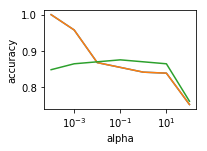

The test accuracy with tau value 0.50 is: 0.875000
The test accuracy with tau value 0.60 is: 0.854167
The test accuracy with tau value 0.70 is: 0.854167
The test accuracy with tau value 0.80 is: 0.833333
The test accuracy with tau value 0.90 is: 0.739583
The test accuracy with tau value 0.95 is: 0.677083
The test accuracy with tau value 0.99 is: 0.500000


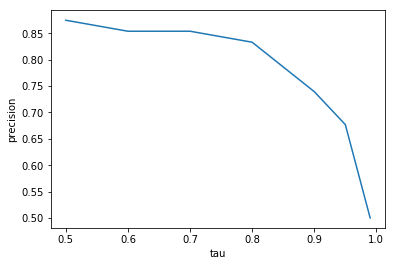

In [62]:
import matplotlib.pyplot as plt
# use this function for deliverable 3.5
def threshold(probs, tau):
    return np.where(probs[:,0] > tau, 'Android', 'iPhone')

# your logistic regression code here
rate = 0.0001
trV = []
teV = []
xAx = [0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
for x in range(7):
    classifier = SGDClassifier(loss = 'log', max_iter = 1000, tol=1.0e-12, random_state=123, alpha = rate)
    classifier.fit(X,Y)
    trV.append(accuracy_score(Y, classifier.predict(X)))
    teV.append(accuracy_score(Y_test, classifier.predict(X_test)))
    print("Training accuracy with alpha value of %.4f was: %.6f" % (rate, accuracy_score(Y, classifier.predict(X))))
    print("Testing accuracy with alpha value of %.4f was: %.6f \n\n" % (rate, accuracy_score(Y_test, classifier.predict(X_test))))
    rate *= 10
plt.subplot(222)
plt.semilogx(xAx, trV)
plt.plot(xAx, trV)
plt.plot(xAx, teV)
plt.ylabel("accuracy")
plt.xlabel("alpha")
plt.show()
''''
classifier1 = SGDClassifier(loss='log', max_iter=1000, tol=1.0e-12, random_state=123, learning_rate = 'invscaling', eta0=10000.0, power_t=2.0)
classifier1.fit(X,Y)
print "The number of SGD iterations is: %d " % classifier1.n_iter_
'''

classifier2 = SGDClassifier(loss='log', max_iter=1000, tol=1.0e-12, random_state=123)
classifier2.fit(X,Y)
tauTest = [0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99]
testAc = []
for t in range(7):
    print("The test accuracy with tau value %.2f is: %.6f" % (tauTest[t], precision_score(threshold(classifier2.predict_proba(X_test), tauTest[t]), Y_test, pos_label='Android')))
    testAc.append(precision_score(threshold(classifier2.predict_proba(X_test), tauTest[t]), Y_test, pos_label='Android'))
plt.plot(tauTest, testAc)
plt.ylabel("precision")
plt.xlabel("tau")
plt.show()

## Problem 4: Sparse learning [5604: 4 points; 4604: +2 EC points]

Add the `penalty` argument to `SGDClassifier` and set the value to `'l1'`, which tells the algorithm to use L1 regularization instead of the default L2. Recall from lecture that L1 regularization encourages weights to stay at exactly $0$, resulting in a more "sparse" model than L2. You should see this effect if you examine the values of `classifier.coef_`.

#### Deliverable 4.1: Write a function to calculate the number of features whose weights are nonzero when using L1 regularization. Calculate the number of nonzero feature weights when `alpha` is one of $[0.00001, 0.0001, 0.001, 0.01, 0.1]$. Create a plot where the x-axis is `alpha` and the y-axis is the number of nonzero weights, using a log scale for the x-axis.

[your solution should either be plotted below, or included in a separate PDF]

In [71]:
# your code here


## Problem 5: Feedback [+1 EC point]

#### Deliverable 5.1: Approximately how much time did you spend on this assignment?

Around 5-7 hours


#### Deliverable 5.2: Do you have requests or suggestions for something else you would have liked to have covered in this assignment or to cover in the next assignment?

Maybe go into more depth on what the SGDClassifier class looks like in sklearn. It's something I'm interested in personally and would love to see the inner workings of what is going on code-wise when you are creating these classifiers with all the different arguments.

